<a href="https://colab.research.google.com/github/MarioCass10/Data-Science-Final-Project/blob/main/Grafico2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

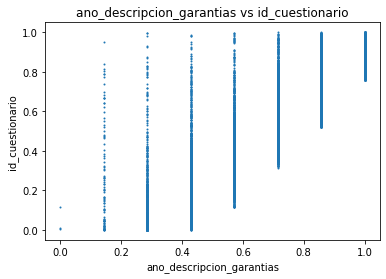

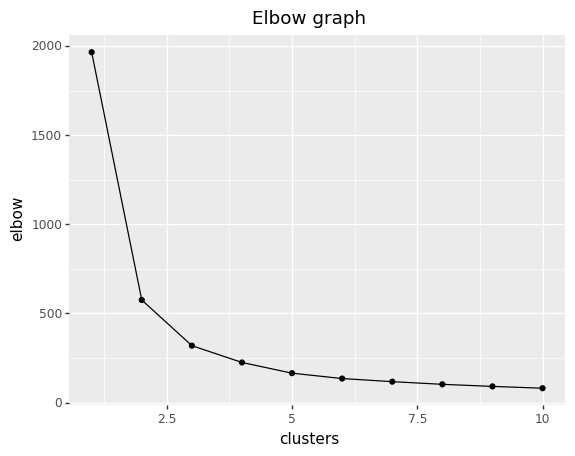


[[0.67614061 0.51156854]
 [0.97526668 0.90822622]
 [0.53710196 0.31603974]
 [0.3975336  0.11310122]
 [0.82861224 0.71485267]]


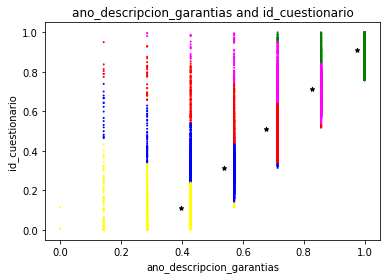

4    3495
3    3081
0    3055
2    2949
1    2735
Name: cluster, dtype: int64

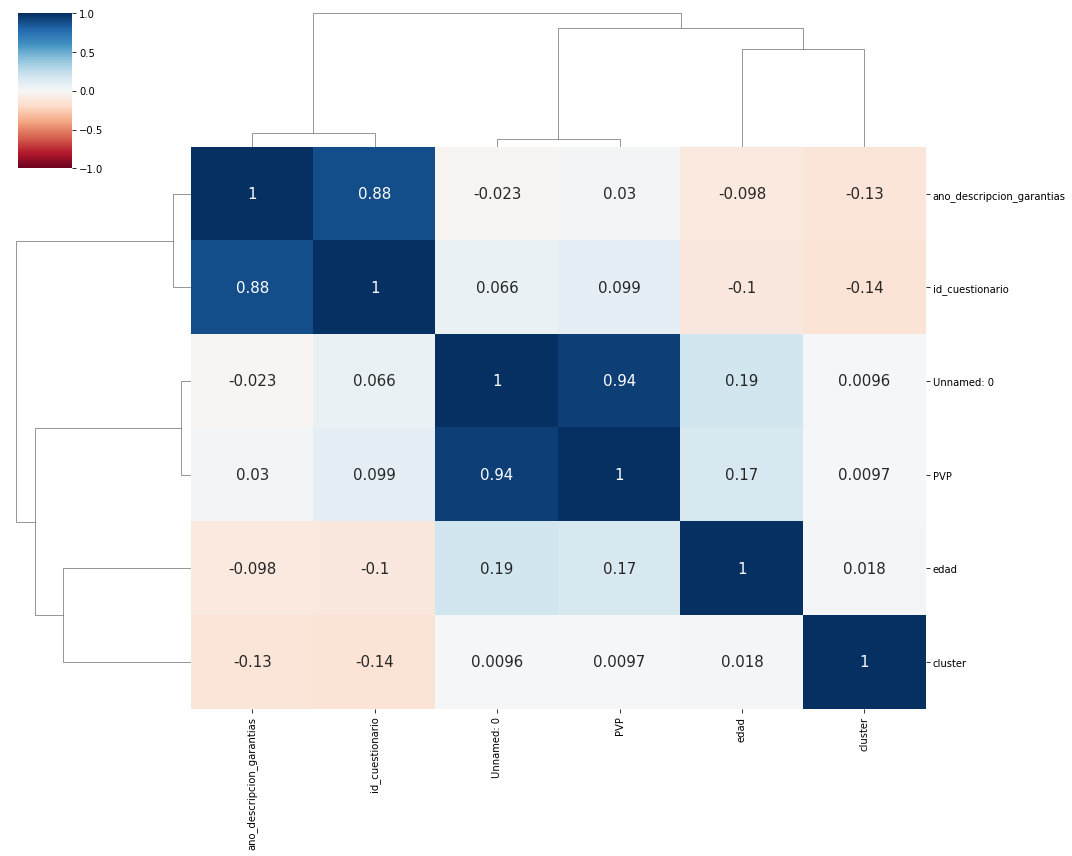

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Carga del dataframe.
datos = pd.read_excel("/content/DataClusterizacion.xlsx")
datoskmeans = datos.loc[:,["ano_descripcion_garantias","id_cuestionario"]]

#Se eliminan filas que tengan valor NaN.
datoskmeans = datoskmeans.dropna()
datoskmeans = datoskmeans.reset_index(drop=True)

#Convertimos variables factor a numerico
'''conversortype1 = preprocessing.LabelEncoder()
conversortype1.fit(datos..astype(str))
datos["type1numerico"] = conversortype1.transform(datos.Type1.astype(str))'''

#Normalización de los datos.
min_max_scaler = preprocessing.MinMaxScaler()
datos_escalados = min_max_scaler.fit_transform(datoskmeans)
datos_escalados = pd.DataFrame(datos_escalados) # Hay que convertir a DF el resultado.
datos_escalados = datos_escalados.rename(columns = {0: 'ano_descripcion_garantias', 1: 'id_cuestionario'})

#Representación gráfica de los datos.
x = datos_escalados['ano_descripcion_garantias'].values
y = datos_escalados['id_cuestionario'].values
plt.xlabel('ano_descripcion_garantias')
plt.ylabel('id_cuestionario')
plt.title('ano_descripcion_garantias vs id_cuestionario')
plt.plot(x,y,'o',markersize=1)

#Curva elbow para determinar valor óptimo de k.
from plotnine import *
elbow_values = []
for i in range(1,11,1):
    km = KMeans(n_clusters=i)
    km.fit(datos_escalados)
    elbow_values.append(km.inertia_)
elbow = pd.DataFrame({"clusters":range(1,11,1), "elbow" : elbow_values})    
   
grafico = ggplot(aes(x = "clusters", y ="elbow"),elbow)+geom_line()+geom_point()+ggtitle("Elbow graph")
print(grafico)

#Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(datos_escalados)
centroids = kmeans.cluster_centers_
print(centroids)

#Etiquetamos nuestro dataframe.
cluster = kmeans.predict(datos_escalados)
datos ["cluster"] = cluster

#Representación gráfica de los clústeres k-means.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in cluster:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('ano_descripcion_garantias')
plt.ylabel('id_cuestionario')
plt.title('ano_descripcion_garantias and id_cuestionario')
plt.show()

#Dendograma de correlaciones
import seaborn as sns
correlaciones = datos.corr()
sns.clustermap(correlaciones,method="complete",cmap="RdBu",annot=True,annot_kws={"size":15},vmin=-1, vmax=1,figsize=(15,12))

#Representación de los clusters en Excel
centroides = datos.groupby(by=("cluster"),as_index=False).mean()
centroides.to_excel("Proyecto2.xlsx")
datos.cluster.value_counts()